# Ouverture de la formation

__Durée : 30 min__

__Objectif :__
 * Présenter ce qui est faisable
 * Montrer l'intérêt du script scientifique
 * Présenter l'étude de cas qui va guider la formation
 
__Tour de table :__
 * Quelle est votre expérience perso et pro à la programmation ?
 * Un exemple d'utilisation à laquelle vous pensez dans votre quotidien ? Qu'est-ce que vous pourriez automatiser dans l'usage de votre ordinateur ou des données ?

## Pourquoi Python ?
* Organiser le flot des données : une "colle"
* Un langage généraliste
* Un langage pédagogique
* Adapté au script scientifique
* Une communauté scientifique qui développe beaucoup d'outils
* Open Source
* Plusieurs versions : actuellement 3.7
* Tout une "stack" d'outils interdépendants qui permettent de gérer des données et des traitements spécifiques

In [ ]:
from IPython.display import Image
Image("./python-shs/scipy-stack.png",width=800)

Dans la formation, nous verrons :
* Python
* Jupyter
* Pandas/Matplotlib/Scipy
* Networkx

## Cas d'étude : la couverture des débats sur l'homéopathie ces deux dernières années dans la presse

Notre question sera : Comment traiter et analyser des données de presse.

Si on décompose, cela signifie : 
* Récupérer les données
* Les mettre en forme
* Faire des traitements statistiques exploratoires
* Faire des analyses avancées

## Récupérer des données

 * Dans notre cas, utiliser le portail Europresse via un accès institutionnel http://paris-sorbonne.libguides.com/europresse_version-classique
  * Requête : article du Monde des deux dernières années mentionnant homéopathie du 01/01/2017 à maintenant
  * Extraction en format html
  * Visualiser du html : le logiciel SublimeText
 * Dans d'autres cas : récupérer à la main pour stocker dans des fichiers .txt indépendants, faire un script de récuparation automatique, etc.


## Charger les données

Quand la quantité des données est raisonnable (souvent en SHS) il est possible de les charger entièrement dans la mémoire vive (sinon, Big Data, autres solutions ...)

In [184]:
#Dans notre cas, les données sont dans un fichier .HTML téléchargé via l'interface
f = open("./Downloads/biblioeuropresse20190418102533.HTML","r")
fichier = f.read()
f.close()

Voir les 100 premières lettres des données "brutes"

In [187]:
fichier[0:1000]

' <!DOCTYPE html> <html> <head> <meta charset="utf-8"/> <title></title> <style type="text/css">html,body{font-family:Arial,\'tahoma\';font-size:11px;background-color:#fff;margin:5px auto;width:95%}section{text-align:justify;line-height:16px}a{color:inherit;*color:#000}em{font-style:normal}mark{background-color:#fbf592;color:#000}.DocText{font-size:12px;line-height:18px;color:#333;margin-top:20px}a:hover{text-decoration:underline}li{list-style-type:none}.stubs{color:inherit;text-decoration:none}.no-transcription{color:#999;font-style:italic}.img-container{min-height:75px}.clearfix{*clear:left}pre{font-size:1em;font-family:Arial,\'tahoma\';white-space:pre-wrap;word-wrap:break-word}.emptyTranscript{display:none}.transcripts{margin:25px 0 60px}.transcript{position:relative;margin:0.15em}.transcript>.time{color:#036;margin-right:10px;text-decoration:underline;width:55px;position:absolute}.transcript>.value{margin:0;margin-left:70px;position:relative;display:inline-block;text-align:justify;l

Comprendre la structure des données : le document est en html ,ce qui signifie que l'on peut le lire avec les balises de description. En regardant la structure du document (où sont les articles, comment ils sont organisés) on se rend compte que chaque article est par exemple entre une balise < article>< /article> ce qui va nous permettre de séparer le fichier en articles. Pareil, le titre est entre des balises bien particulière.

## Mettre en forme les données

On utilise la librairie Beautifulsoup qui permet de chercher dans un document html des balises particulières

In [1]:
import pandas as pd
import bs4 as bs

#Une fonction qui extrait les informations d'un fichier .html d'Europresse
def extract(file):    
    #On utilise BeautifulSoup pour lire le fichier
    corpus_html = bs.BeautifulSoup(open(file),"lxml")
    
    corpus = [] #tableau que l'on va remplir avec les données
    
    # On fait une boucle sur chaque article du corpus entre des balises articles
    for i in corpus_html.find_all("article"):
        
        #on regarde s'il y a un titre dans l'article
        try:
            titre = i.find("div",{"class":"titreArticle"}).text 
        except:
            titre = None #sinon on renvoie rien
            
        #Pareil pour la date/header
        try:
            header = i.find("span",{"class":"DocHeader"}).text
        except:
            header = None
        
        #Le nom de la publicatoin
        try:
            publication = i.find("span",{"class":"DocPublicationName"}).text
        except:
            publication = None
         
        #le contenu
        try:
            text = i.find("div",{"class":"DocText clearfix"}).text
        except:
            text = None
            
        #On ajoute ces éléments au corpus
        corpus.append([header,titre,publication,text])
        
    return corpus #On renvoie les informations

In [6]:
#On extrait les données du fichier téléchargé
corpus = extract("./../../../../Downloads/biblioeuropresse20190418102533.HTML")

#On le met sous un format Pandas
corpus = pd.DataFrame(corpus)

#On le met en forme
corpus.columns = ["Date","Titre","Journal","Contenu"]

Regarder le corpus

In [7]:
corpus[0:5]

,Date,Titre,Journal,Contenu
0,"Science & Médecine, mercredi 23 mai 2018 246...",Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...
1,"Événement, samedi 16 juin 2018 1243 mots, p. 4",Principale «Réduire l'homéopathie à un effet ...,"Libération, no. 11524","Le regard, au-dessus des petites lunettes ce..."
2,"Sciences et éthique, mardi 10 avril 2018 105...",Faut-il en finir avec l'homéopathie? Une trib...,"La Croix, no. 41073",Faut-il se débarrasser de l'homéopathie? Voi...
3,"Science & Médecine, mercredi 28 novembre 201...","Nofakemed, symptôme d'un malaise médical Nofa...",Le Monde,Les médecines complémentaires et en particul...
4,"Événement, samedi 16 juin 2018 972 mots, p. 2",Homéopathie Principale Homéopathie : la guégu...,"Libération, no. 11524","Agnès Buzyn, la ministre de la Santé, s'est ..."


In [192]:
#On le sauvegarde
corpus.to_excel("./Downloads/base.xlsx")

Par contre les dates ne sont pas dans un format très utilisable

### Recoder les dates

Pour cela, on utilise deux librairies : les expressions régulières regex, et la mise en forme de dates de datetime

On va chercher dans chaque élément de la colonne Date les motifs qui ressemblent à *mot mot quatre-chiffres* avec une expression régulière, puis remplacer le mois en toute lettre par le mois en chiffre

In [8]:
import regex as re
import datetime

def reco_date(x):
    #conversion lettres/chiffres
    mois = {"janvier":"01","février":"02","mars":"03",
            "avril":"04","mai":"05","juin":"06","juillet":"07",
            "août":"08","septembre":"09","octobre":"10","novembre":"11","décembre":"12"}
    
    #Trouver le motif
    t = re.findall("\w+ \w+ [0-9]{4}",x)
    
    #Si pas trouvé, renvoyer rien
    if len(t) <1:
        return None
    #Sinon prendre le premier élément
    t = t[0]
    
    #Remplacer le mois pour une mise en forme
    for i in mois:
        if i in t:
            t = t.replace(i,"/%s/"%mois[i]).replace(" ","")

    #Mettre sous la forme d'un objet datetime 
    t = datetime.datetime.strptime(t,"%d/%m/%Y")
            
    return t

In [9]:
#Recoder la date dans le corpus
corpus["Date_reco"] = corpus["Date"].apply(reco_date)
#Dire à Pandas que c'est une colonne date
corpus["Date_reco"] = pd.to_datetime(corpus["Date_reco"])
#La passer en index
corpus = corpus.set_index("Date_reco")

Le nouveau corpus

In [10]:
corpus[0:5]

,Date,Titre,Journal,Contenu
Date_reco,,,,
2018-05-23,"Science & Médecine, mercredi 23 mai 2018 246...",Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...
2018-06-16,"Événement, samedi 16 juin 2018 1243 mots, p. 4",Principale «Réduire l'homéopathie à un effet ...,"Libération, no. 11524","Le regard, au-dessus des petites lunettes ce..."
2018-04-10,"Sciences et éthique, mardi 10 avril 2018 105...",Faut-il en finir avec l'homéopathie? Une trib...,"La Croix, no. 41073",Faut-il se débarrasser de l'homéopathie? Voi...
2018-11-28,"Science & Médecine, mercredi 28 novembre 201...","Nofakemed, symptôme d'un malaise médical Nofa...",Le Monde,Les médecines complémentaires et en particul...
2018-06-16,"Événement, samedi 16 juin 2018 972 mots, p. 2",Homéopathie Principale Homéopathie : la guégu...,"Libération, no. 11524","Agnès Buzyn, la ministre de la Santé, s'est ..."


Le sauvegarder

In [11]:
corpus.to_excel("./../Données/corpus-mis-en-forme.xlsx")

### Visualiser l'évolution dans le temps

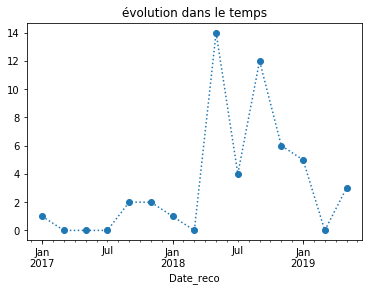

In [196]:
corpus["num"] = 1 #Colonne du nombre d'article par ligne (=1 au début)
#regrouper par tranche de deux mois, additionner, et visualiser
corpus["num"].resample("2M").sum().plot(style="o:",title="évolution dans le temps")

### Passer sous un autre format (Iramuteq) pour traiter des données

In [159]:
with open("./iramuteq-corpus.txt","w") as f: #Ouvrir un fichier
    for i,j in corpus.iterrows():
        f.write("**** *date_%d *journal_%s \n\n %s \n %s \n\n" % (i.year,j["Journal"],j["Titre"],j["Contenu"].replace("*","")))

## Avant de commencer :

* Il y a toujours plusieurs manières de faire quelque chose
* Programmer c'est un aller retour entre des idées, des exemples, et la documentation
* Il vaut mieux faire un premier code moche et l'améliorer que de ne rien faire :)